In [1]:
%matplotlib inline
# import sys
# sys.path
# sys.path.append('.')
# print(sys.path)

In [2]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from DA_Dataset import DA_Dataset

In [3]:
#load train
B = 1
data_path = '../../DA_data/train/'
trainset = DA_Dataset(data_path)
trainloader = torch.utils.data.DataLoader( trainset, batch_size=B,
                                           shuffle=True, num_workers=2)
data_path  = '../../DA_data/train/'
testset    = DA_Dataset(data_path)
testloader = torch.utils.data.DataLoader( testset, batch_size=B,
                                          shuffle=True, num_workers=2)

In [4]:
#load test

# data_path = '../../DA_data/test/'
# testset = DA_Dat'../../aset(data_path)
# testloader = torch.utils.data.DataLoader(valset, batch_size=4,
#                                          shuffle=False, num_workers=2)

In [5]:
classes = (0, 1, 2, 3)

In [6]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print(device)

cpu


In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        #layer 1 
        self.conv1  = nn.Conv1d(1, 8, 7)
        self.batch1 = nn.BatchNorm1d(8)
        self.relu1  = nn.ReLU()
        self.drop1  = nn.Dropout()
        self.pool1  = nn.MaxPool1d(2, stride=2)
        
        #layer 2
        self.conv2  = nn.Conv1d(8, 16, 7)
        self.batch2 = nn.BatchNorm1d(16)
        self.relu2  = nn.ReLU()
        self.drop2  = nn.Dropout()
        self.pool2  = nn.MaxPool1d(2, stride=2)
       
        #layer 3 
        self.conv3  = nn.Conv1d(16, 32, 7)
        self.batch3 = nn.BatchNorm1d(32)
        self.relu3  = nn.ReLU()
        
        #fully
        self.fc1   = nn.Linear(177 * 32, 16)
        self.relu4 = nn.ReLU()
        self.fc2   = nn.Linear(16, 4)
    
    def forward(self, x):
        
        #layer 1 
        x = self.conv1(x)  
        x = self.batch1(x) 
        x = self.relu1(x)
        x = self.drop1(x)
        x = self.pool1(x)
        
        #layer 2
        x = self.conv2(x)
        x = self.batch2(x)
        x = self.relu2(x)
        x = self.drop2(x)
        x = self.pool2(x)
       
        #layer 3 
        x = self.conv3(x)
        x = self.batch3(x)
        x = self.relu3(x)
        
        x=x.view(-1, 177 * 32)
        
        #fully
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)

        return x


net = Net()

net.to(device)

Net(
  (conv1): Conv1d(1, 8, kernel_size=(7,), stride=(1,))
  (batch1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (drop1): Dropout(p=0.5)
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(8, 16, kernel_size=(7,), stride=(1,))
  (batch2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (drop2): Dropout(p=0.5)
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(16, 32, kernel_size=(7,), stride=(1,))
  (batch3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc1): Linear(in_features=5664, out_features=16, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=16, out_features=4, bias=True)
)

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
def calcAcc():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:

            inputs, labels = data['x'], data['lable']
            inputs =  inputs.to(device).float()
            labels =  labels.to(device).long()
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

#     print('Accuracy of the network: %d %%' % (
#         100 * correct / total))
    
    return 100 * correct / total

<IPython.core.display.Javascript object>


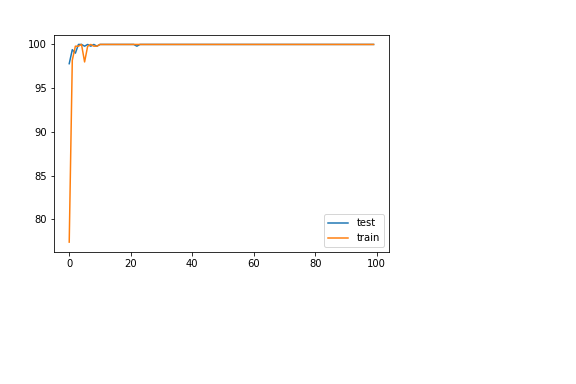

Finished Training


In [10]:
SHOW_ACCURICY = 5000

NUM_OF_EPOC   = 100

acc = []
train_acc = []
idx = 0
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


for epoch in range(NUM_OF_EPOC):  # loop over the dataset multiple times
    running_loss = 0.0
    total   = 0
    correct = 0
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs

        inputs, labels = data['x'], data['lable']
        
        
        inputs =  inputs.to(device).float()
        labels =  labels.to(device).long()
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        
        # print statistics
#         running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total   += labels.size(0)
        correct += (predicted == labels).sum().item()
        
#         if idx % SHOW_ACCURICY == 0 :
#             acc.append( calcAcc() )
#             ax.clear()
#             ax.plot(np.array(acc))
#             ax.plot(np.array(train_acc))    
#             fig.canvas.draw()
   

    train_acc.append(100 * correct/total)
    acc.append( calcAcc() )
    ax.clear()
    ax.plot(np.array(acc))
    ax.plot(np.array(train_acc))    
    ax.legend(['test','train'])
    fig.canvas.draw()
    
print('Finished Training')

In [11]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        inputs, labels = data['x'], data['lable']
        inputs =  inputs.to(device).float()
        labels =  labels.to(device).long()
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(1):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

IndexError: invalid index of a 0-dim tensor. Use tensor.item() to convert a 0-dim tensor to a Python number